# Chicago Crime Data Analysis

# Project Group: 
* Christopher Habib 
* Siddharth Krishnan
* Ali Kashani 
* Elmaddin Karimov

# Curated datasets:

https://dev.socrata.com/foundry/data.cityofchicago.org/6zsd-86xi

https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2

In [128]:
## Import necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
from pandas import ExcelWriter
from pandas import ExcelFile
from scipy.stats import sem

 


In [2]:
# Load in the Chicago crime dataset
df = pd.read_csv('resources/Crimes_-_2001_to_present.csv')
census = pd.read_csv('resources/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')

### View subset of data

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11089469,JA433708,09/16/2017 12:45:00 PM,010XX W 51ST ST,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,STREET,False,False,...,16.0,61.0,14,1170427.0,1871001.0,2017,02/10/2018 03:50:01 PM,41.801512,-87.650507,"(41.801512193, -87.650507242)"
1,3043050,HJ754728,11/12/2003 12:45:00 PM,070XX S CRANDON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,5.0,43.0,08B,1192539.0,1858824.0,2003,02/28/2018 03:56:25 PM,41.767587,-87.569812,"(41.767587038, -87.569812006)"
2,3043051,HJ756159,11/13/2003 07:30:00 AM,045XX W LAKE ST,1330,CRIMINAL TRESPASS,TO LAND,CTA PLATFORM,True,False,...,28.0,26.0,26,1146180.0,1901682.0,2003,02/28/2018 03:56:25 PM,41.886199,-87.738652,"(41.88619916, -87.738651896)"
3,3043052,HJ720983,10/27/2003 11:46:21 AM,050XX W IRVING PARK RD,2028,NARCOTICS,POSS: SYNTHETIC DRUGS,STREET,True,False,...,45.0,15.0,18,1142231.0,1926127.0,2003,02/28/2018 03:56:25 PM,41.953353,-87.752546,"(41.953353003, -87.75254576)"
4,3043053,HJ754620,11/12/2003 12:48:12 PM,043XX W MONROE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,...,28.0,26.0,08B,1147544.0,1899310.0,2003,02/28/2018 03:56:25 PM,41.879664,-87.733704,"(41.879664074, -87.733703787)"


In [4]:
census.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [5]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
 census.columns

Index(['Community Area Number', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

## What crimes are most prevalent in Chicago?

In [7]:
## Check if any rows are missing data and are null
df['Primary Type'].isnull().values.any()

False

In [8]:
## Count number of observations for each crime
df['Primary Type'].value_counts()

THEFT                                1435247
BATTERY                              1244773
CRIMINAL DAMAGE                       778239
NARCOTICS                             714835
ASSAULT                               423716
OTHER OFFENSE                         423379
BURGLARY                              390929
MOTOR VEHICLE THEFT                   316905
DECEPTIVE PRACTICE                    268057
ROBBERY                               258033
CRIMINAL TRESPASS                     195206
WEAPONS VIOLATION                      72147
PROSTITUTION                           68512
PUBLIC PEACE VIOLATION                 48150
OFFENSE INVOLVING CHILDREN             46028
CRIM SEXUAL ASSAULT                    27667
SEX OFFENSE                            25448
INTERFERENCE WITH PUBLIC OFFICER       15487
GAMBLING                               14433
LIQUOR LAW VIOLATION                   14110
ARSON                                  11252
HOMICIDE                                9553
KIDNAPPING

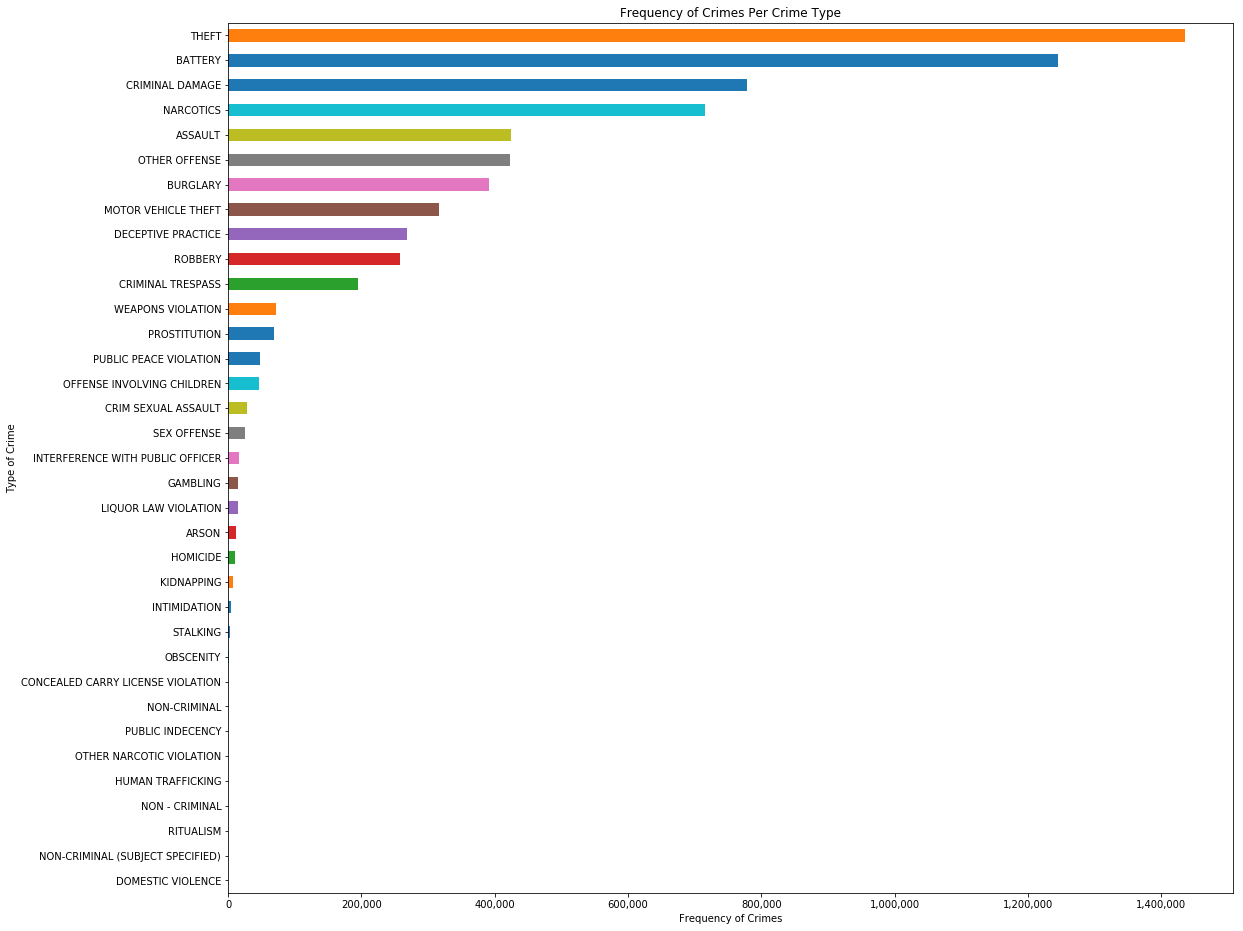

In [9]:
## Plot these for better visualization
crime_type_df = df['Primary Type'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(18, 16))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
ax = crime_type_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.savefig("output_data/TypeOFCrime.png")


## What year had the most crime?

In [10]:
## Check if any rows are missing data and are null
df['Year'].isnull().values.any()

False

In [11]:
## Count number of reported crimes for each year
df['Year'].value_counts()

2002    486754
2001    485752
2003    475940
2004    469383
2005    453715
2006    448108
2007    437011
2008    427056
2009    392679
2010    370309
2011    351774
2012    335961
2013    307089
2014    275266
2016    268954
2017    268016
2018    265866
2015    264048
2019     34060
Name: Year, dtype: int64

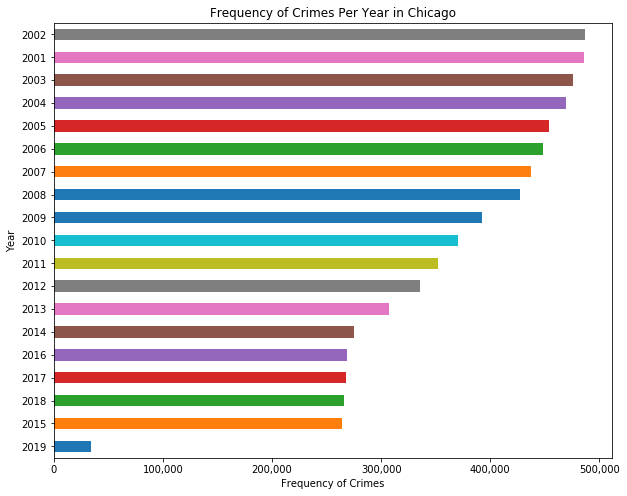

In [12]:
## Plot these for better visualization
crime_year_df = df['Year'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(10, 8))
plt.title("Frequency of Crimes Per Year in Chicago")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Year")
ax = crime_year_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.savefig("output_data/FrequencyOfCrimesPerYear.png")

## What percentage of arrests were successful?

In [13]:
## Check if any rows are missing data and are null
df['Arrest'].isnull().values.any()

False

In [14]:
## Count number of successful arrests for each year
df['Arrest'].value_counts()

False    4931296
True     1886445
Name: Arrest, dtype: int64

In [15]:
## Convert values into percentages
arrest_df = df['Arrest'].value_counts()
arrest_percent = (arrest_df / df['Arrest'].sum()) * 100 

## Rename Series.name
arrest_percent.rename("% of Arrests",inplace=True)

## Rename True and False to % Arrested and % Not Arrested
arrest_percent.rename({True: '% Arrested', False: '% Not Arrested'},inplace=True)

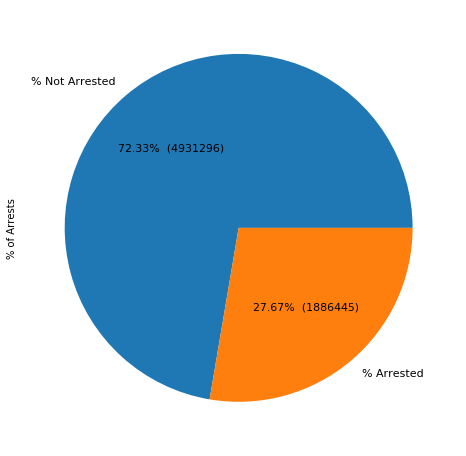

In [16]:
## Format pie chart to nicely show percentage and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

## Plot results in a pie chart
arrest_percent.plot.pie(fontsize=11,
                       autopct=make_autopct(df['Arrest'].value_counts()),
                       figsize=(8, 8))
plt.savefig("output_data/PercentageOfArrests.png")


## What are the successful arrest percentages per year?

In [17]:
## Group dataset by year and arrests
arrest_per_year = df.groupby('Year')['Arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,Arrest,Counts,Percentage
Year,,,
2001,False,343850,70.787151
2001,True,141902,29.212849
2002,False,345201,70.918986
2002,True,141553,29.081014
2003,False,334368,70.254234
2003,True,141572,29.745766
2004,False,324697,69.175279
2004,True,144686,30.824721
2005,False,312820,68.946365


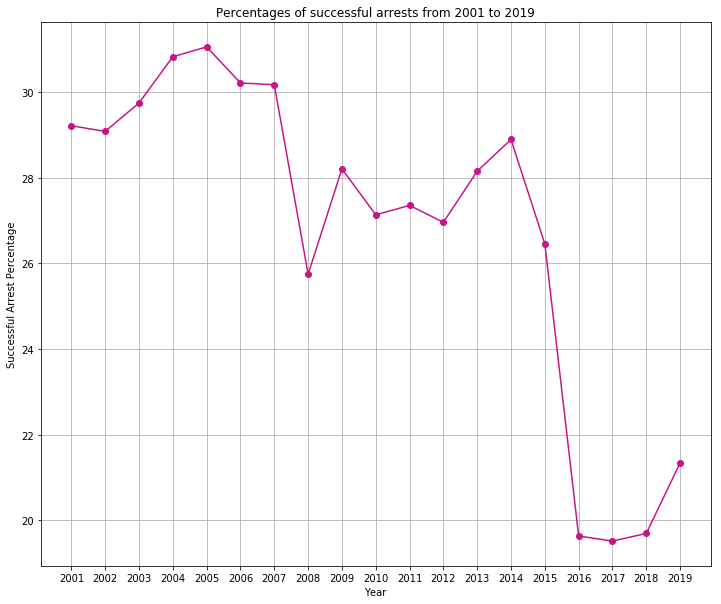

In [18]:
## Create a line plot for percentages of successful arrests over time (2001 to present)
line_plot = arrest_per_year[arrest_per_year['Arrest'] == True]['Percentage']

## Configure line plot to make visualizing data cleaner
labels = line_plot.index.values
fig=plt.figure(figsize=(12, 10))
plt.title('Percentages of successful arrests from 2001 to 2019')
plt.xlabel("Year")
plt.ylabel("Successful Arrest Percentage")
plt.xticks(line_plot.index, line_plot.index.values)

line_plot.plot(grid=True, marker='o', color='mediumvioletred')
plt.savefig("output_data/SuccessfulArrest.png")


## Data visualization for crimes based on district from 2001 to present

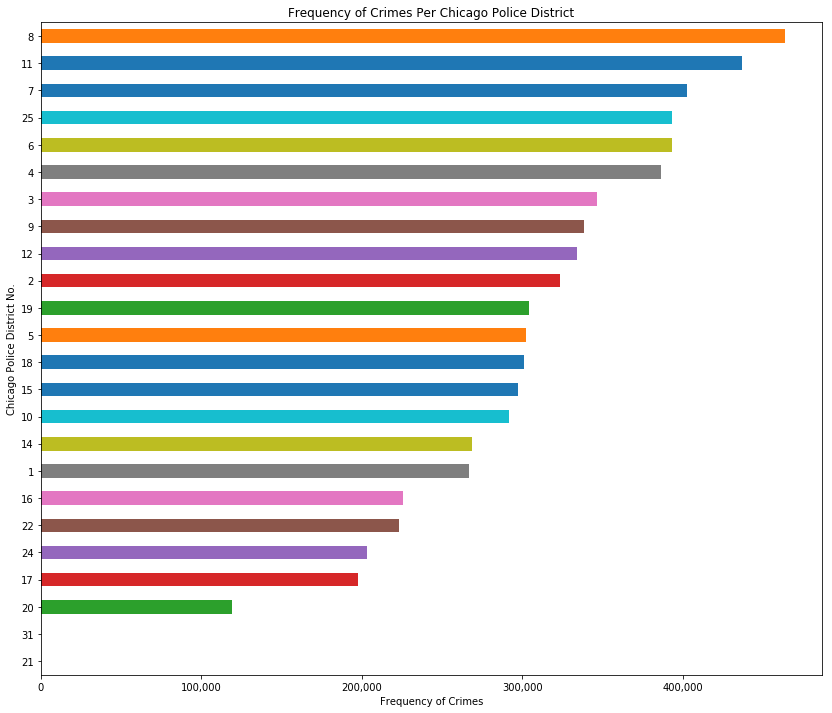

In [19]:
# calculating total number of incidents per district
district_crime = df['District'].value_counts(ascending=True)

## Data cleaning
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

## Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.savefig("output_data/FrequencyOfCrimesPerPolisDist.png")


In [20]:
df['Primary Type'] = df['Primary Type'].replace(
    {'MOTOR VEHICLE THEFT': 'THEFT', 'ROBBERY': 'THEFT'})
df["Primary Type"].value_counts()

THEFT                                2010185
BATTERY                              1244773
CRIMINAL DAMAGE                       778239
NARCOTICS                             714835
ASSAULT                               423716
OTHER OFFENSE                         423379
BURGLARY                              390929
DECEPTIVE PRACTICE                    268057
CRIMINAL TRESPASS                     195206
WEAPONS VIOLATION                      72147
PROSTITUTION                           68512
PUBLIC PEACE VIOLATION                 48150
OFFENSE INVOLVING CHILDREN             46028
CRIM SEXUAL ASSAULT                    27667
SEX OFFENSE                            25448
INTERFERENCE WITH PUBLIC OFFICER       15487
GAMBLING                               14433
LIQUOR LAW VIOLATION                   14110
ARSON                                  11252
HOMICIDE                                9553
KIDNAPPING                              6706
INTIMIDATION                            3989
STALKING  

In [21]:
census = census.rename(columns={"Community Area Number":"Community Area"})
census.head()

,Community Area,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [22]:
crime08 = df.loc[df["Year"]==2008]

In [23]:
crime09 = df.loc[df["Year"]==2009]


In [24]:
crime10 = df.loc[df["Year"]==2010]


In [25]:
crime11 = df.loc[df["Year"]==2011]


In [26]:
crime12 = df.loc[df["Year"]==2012]


In [27]:

crime_data=pd.merge(crime08,census,on="Community Area")
crime_data1=pd.merge(crime09,census,on="Community Area")
crime_data2=pd.merge(crime10,census,on="Community Area")
crime_data3=pd.merge(crime11,census,on="Community Area")
crime_data4=pd.merge(crime12,census,on="Community Area")

In [28]:
crime2=pd.concat([crime_data, crime_data1,crime_data2,crime_data3,crime_data4])
crime2.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'COMMUNITY AREA NAME', 'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

In [29]:
theft=crime2.loc[crime2["Primary Type"]=="THEFT"]
theft

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
5,5992396,HP101047,01/01/2008 09:00:00 AM,091XX S THROOP ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,-87.655535,"(41.727745019, -87.655534831)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
8,5994401,HP103265,01/02/2008 07:00:00 PM,094XX S NORMAL AVE,0915,THEFT,"TRUCK, BUS, MOTOR HOME",STREET,False,False,...,-87.635969,"(41.722926929, -87.635969436)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
10,5996414,HP104780,01/03/2008 07:10:00 AM,089XX S LOOMIS ST,0810,THEFT,OVER $500,STREET,False,False,...,-87.658080,"(41.731670655, -87.658080081)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
21,5999804,HP107869,01/01/2008 12:00:00 AM,015XX W 95TH ST,0810,THEFT,OVER $500,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,...,-87.660354,"(41.721241868, -87.660354127)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
23,6000221,HP106825,01/04/2008 10:00:00 PM,089XX S JUSTINE ST,0820,THEFT,$500 AND UNDER,STREET,False,True,...,-87.661721,"(41.731390119, -87.661720981)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
25,6000596,HP109001,01/06/2008 06:07:00 AM,105XX S GREEN ST,031A,THEFT,ARMED: HANDGUN,STREET,False,False,...,-87.643916,"(41.702606515, -87.643915804)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
29,6001578,HP109012,01/06/2008 06:00:00 AM,095XX S HALSTED ST,031A,THEFT,ARMED: HANDGUN,STREET,False,False,...,-87.643203,"(41.721005667, -87.643202686)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
32,6001682,HP109417,01/06/2008 01:30:00 PM,098XX S HALSTED ST,0860,THEFT,RETAIL THEFT,GAS STATION,False,False,...,-87.643056,"(41.71557103, -87.643055717)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
42,6005271,HP112463,01/08/2008 01:00:00 AM,012XX W 97TH ST,0910,THEFT,AUTOMOBILE,STREET,False,False,...,-87.653717,"(41.718118187, -87.653716662)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
43,6005549,HP112713,01/08/2008 01:00:00 AM,010XX W 104TH PL,0810,THEFT,OVER $500,STREET,False,False,...,-87.648371,"(41.704134303, -87.648370856)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0


In [92]:
no_theft = crime2.loc[crime2["Primary Type"]!="THEFT"]
no_theft.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Hardship Bracket
0,11100210,JA447501,01/01/2008 12:00:00 PM,103XX S GREEN ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0,40-50
1,11158415,JA523389,09/01/2008 09:35:00 AM,095XX S HALSTED ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0,40-50
2,5992060,HP101193,01/01/2008 09:00:00 AM,091XX S HALSTED ST,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,"(41.728032252, -87.643391254)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0,40-50
3,5992135,HP101743,01/02/2008 12:00:00 AM,005XX W 95TH ST,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,...,"(41.721536767, -87.637526609)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0,40-50
4,5992236,HP101550,01/01/2008 09:35:00 PM,010XX W 92ND ST,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,"(41.726869474, -87.649034262)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0,40-50


In [30]:
theft["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"].max()

54.8

In [31]:
theft["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"].min()

2.5

In [32]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 5, 10, 15, 20, 25,30,35,40,45,50,55]

# Create the names for the four bins
group_names = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%","25-30%","30-35%","35-40%","40-45%","45-50%","50-55%"]

theft["High School Graduate Percentage"] = pd.cut(theft["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"], bins, labels=group_names)
a=theft["High School Graduate Percentage"].value_counts()/1000

a1=pd.DataFrame(a.sort_index())
a1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,High School Graduate Percentage
0-5%,99.358
5-10%,33.626
10-15%,118.199
15-20%,83.236
20-25%,78.196
25-30%,51.724
30-35%,30.704
35-40%,29.352
40-45%,17.390
45-50%,5.033


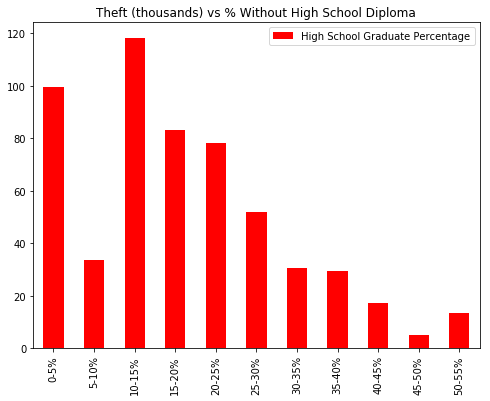

In [33]:
a1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.title("Theft (thousands) vs % Without High School Diploma")
plt.savefig("output_data/Theft_Without_High_School_Diploma.png")

plt.show()

In [34]:
theft["PERCENT AGED 16+ UNEMPLOYED"].max()

35.9

In [35]:
theft["PERCENT AGED 16+ UNEMPLOYED"].min()

4.7

In [36]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 5, 10, 15, 20, 25,30,35,40]

# Create the names for the four bins
group_names = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%","25-30%","30-35%","35-40%"]

theft["Unemployment %"] = pd.cut(theft["PERCENT AGED 16+ UNEMPLOYED"], bins, labels=group_names)
b=theft["Unemployment %"].value_counts()/1000

b1=pd.DataFrame(b.sort_index())
b1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unemployment %
0-5%,22.524
5-10%,194.910
10-15%,74.250
15-20%,106.816
20-25%,108.321
25-30%,37.502
30-35%,3.173
35-40%,12.963


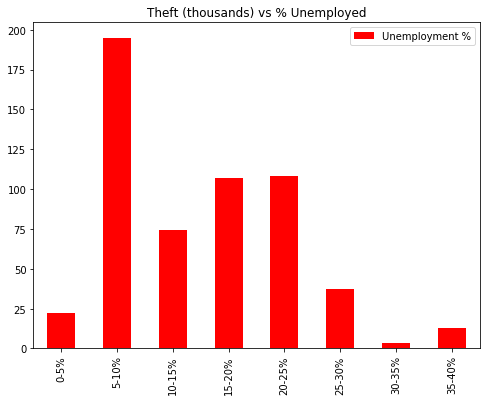

In [37]:
b1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.title("Theft (thousands) vs % Unemployed")
plt.savefig("output_data/Theft_vs_Unemployed.png")
plt.show()

In [38]:
theft["PERCENT HOUSEHOLDS BELOW POVERTY"].max()

56.5

In [39]:
theft["PERCENT HOUSEHOLDS BELOW POVERTY"].min()

3.3

In [40]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 5, 10, 15, 20, 25,30,35,40,45,50,55,60]

# Create the names for the four bins
group_names = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%","25-30%","30-35%","35-40%","40-45%","45-50%","50-55%","55-60%"]

theft["% Houses Under Poverty"] = pd.cut(theft["PERCENT HOUSEHOLDS BELOW POVERTY"], bins, labels=group_names)
c=theft["% Houses Under Poverty"].value_counts()
c_df = pd.DataFrame(c)

c_df["relative"]=c_df["% Houses Under Poverty"]/1000
c1=pd.DataFrame(c_df["relative"].sort_index())
c1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,relative
0-5%,1.667
5-10%,18.324
10-15%,159.886
15-20%,96.147
20-25%,57.111
25-30%,120.416
30-35%,57.452
35-40%,1.075
40-45%,33.246
45-50%,11.962


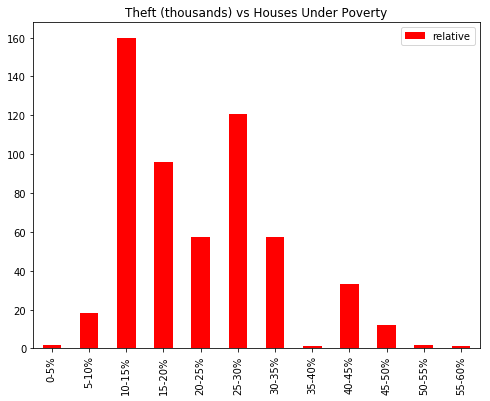

In [41]:
c1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.title("Theft (thousands) vs Houses Under Poverty")
plt.savefig("output_data/Theft_vs_Houses_Under_Poverty.png")
plt.show()

In [42]:
theft["PERCENT OF HOUSING CROWDED"].max()

15.8

In [43]:
theft["PERCENT OF HOUSING CROWDED"].min()

0.3

In [44]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 4,8,12,16]

# Create the names for the four bins
group_names = ["0-4%", "4-8%", "8-12%", "12-16%", ]

theft["% Crowded Housing"] = pd.cut(theft["PERCENT OF HOUSING CROWDED"], bins, labels=group_names)
d=theft["% Crowded Housing"].value_counts()/1000

d1 = pd.DataFrame(d)
d1


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,% Crowded Housing
0-4%,332.288
4-8%,144.309
8-12%,51.899
12-16%,31.963


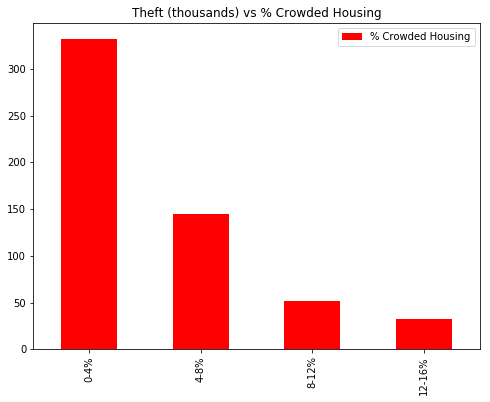

In [45]:
d1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.title("Theft (thousands) vs % Crowded Housing")
plt.savefig("output_data/Theft_vs_%Crowded_Housing.png")
plt.show()

In [46]:
theft["PER CAPITA INCOME "].max()

88669

In [47]:
theft["PER CAPITA INCOME "].min()

8201

In [48]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 10000,20000,30000,40000,50000,60000,70000,80000,90000]

# Create the names for the four bins
group_names = ["0-10,000", "10,000-20,000", "20,000-30,000", "30,000-40,000","40,000-50,000","50,000-60,000","60,000-70,000","70,000-80,000","80,000-90,000" ]

theft["Per Capita Income Bracket"] = pd.cut(theft["PER CAPITA INCOME "], bins, labels=group_names)
e=theft["Per Capita Income Bracket"].value_counts()/1000
e1=pd.DataFrame(e.sort_index())
e1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Per Capita Income Bracket
"0-10,000",1.273
"10,000-20,000",273.766
"20,000-30,000",94.125
"30,000-40,000",49.528
"40,000-50,000",47.298
"50,000-60,000",8.993
"60,000-70,000",40.758
"70,000-80,000",15.522
"80,000-90,000",29.196


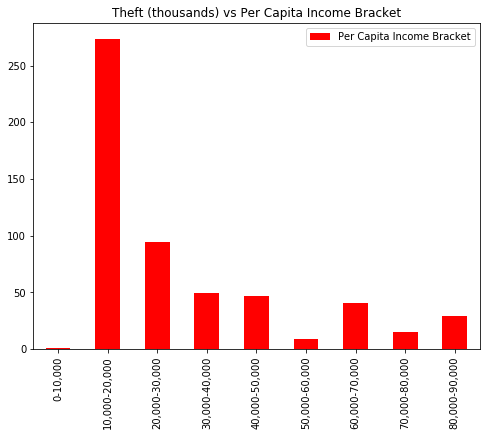

In [49]:
e1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.title("Theft (thousands) vs Per Capita Income Bracket")
plt.savefig("output_data/Theft_vs_Per_Capita_Income_Bracket.png")
plt.show()

In [50]:
theft['HARDSHIP INDEX'].max()

98.0

In [51]:
theft['HARDSHIP INDEX'].min()

1.0

In [52]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 10,20,30,40,50,60,70,80,90,100]

# Create the names for the four bins
group_names = ["0-10", "10-20", "20-30", "30-40","40-50","50-60","60-70","70-80","80-90","90-100" ]

crime2["Hardship Bracket"] = pd.cut(crime2['HARDSHIP INDEX'], bins, labels=group_names)
f=crime2["Hardship Bracket"].value_counts()/1000
f1=pd.DataFrame(f.sort_index())
f1

,Hardship Bracket
0-10,247.906
10-20,132.678
20-30,111.649
30-40,123.577
40-50,111.349
50-60,250.097
60-70,160.882
70-80,299.701
80-90,250.561
90-100,188.494


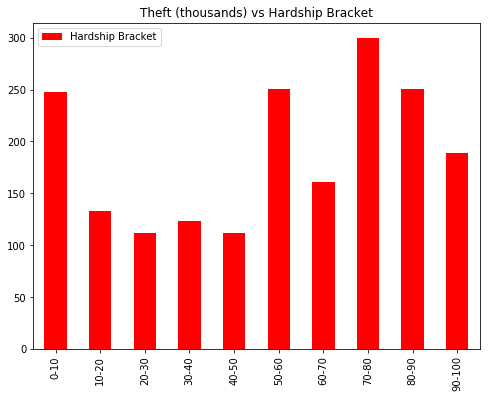

In [53]:
f1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.title("Theft (thousands) vs Hardship Bracket")
plt.savefig("output_data/Theft_vs_Hardship_Bracket.png")
plt.show()

In [56]:
merged_df = pd.merge(df,census,on="Community Area")
merged_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,11089469,JA433708,09/16/2017 12:45:00 PM,010XX W 51ST ST,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,STREET,False,False,...,-87.650507,"(41.801512193, -87.650507242)",New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
1,3043080,HJ711694,10/22/2003 10:03:21 PM,010XX W GARFIELD BLVD,1822,NARCOTICS,MANU/DEL:CANNABIS OVER 10 GMS,STREET,True,False,...,-87.650320,"(41.794241476, -87.650320383)",New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
2,3043253,HJ754110,11/11/2003 05:30:00 PM,046XX S BISHOP ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,-87.661343,"(41.809759536, -87.661343173)",New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
3,3043494,HJ711484,10/22/2003 08:11:24 PM,049XX S LAFLIN ST,2027,NARCOTICS,POSS: CRACK,STREET,True,False,...,-87.662411,"(41.803722875, -87.662411211)",New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
4,3043548,HJ720888,10/27/2003 11:15:00 AM,008XX W 51ST PL,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,-87.646126,"(41.800662784, -87.646126203)",New City,11.9,29.0,23.0,41.5,38.9,12765,91.0


In [80]:
crime_by_area=crime2.groupby("Community Area")
crime_count = crime_by_area.count()
crime_count["ID"]

Community Area
1.0      28084
2.0      24042
3.0      26018
4.0      12638
5.0      10956
6.0      38661
7.0      29028
8.0      59903
9.0       1856
10.0      8074
11.0      7395
12.0      3451
13.0      6239
14.0     16997
15.0     24217
16.0     22348
17.0     12081
18.0      4647
19.0     37205
20.0     11491
21.0     18219
22.0     39921
23.0     60241
24.0     55715
25.0    121675
26.0     33161
27.0     34661
28.0     50856
29.0     53101
30.0     31764
         ...  
48.0     10647
49.0     52939
50.0      7021
51.0     12700
52.0      9737
53.0     31535
54.0      7312
55.0      4120
56.0     14550
57.0      7072
58.0     18506
59.0      7807
60.0     12147
61.0     39466
62.0      7599
63.0     18849
64.0      7586
65.0     14273
66.0     50802
67.0     57107
68.0     51748
69.0     47227
70.0     17492
71.0     55010
72.0      6793
73.0     22419
74.0      4190
75.0     15618
76.0     10156
77.0     18068
Name: ID, Length: 77, dtype: int64

In [81]:
theft_by_area = theft.groupby("Community Area")
theft_count = theft_by_area.count()
theft_count["ID"]


Community Area
1.0      7862
2.0      7658
3.0      8533
4.0      4646
5.0      4563
6.0     18094
7.0     15522
8.0     29196
9.0       481
10.0     2489
11.0     2136
12.0     1114
13.0     2212
14.0     4997
15.0     7715
16.0     7442
17.0     3691
18.0     1520
19.0    11315
20.0     2848
21.0     6287
22.0    15579
23.0    13289
24.0    23469
25.0    26471
26.0     6988
27.0     7789
28.0    22234
29.0    11224
30.0     8328
        ...  
48.0     3620
49.0    13007
50.0     1693
51.0     3314
52.0     2000
53.0     7300
54.0     1273
55.0     1071
56.0     3819
57.0     2372
58.0     5033
59.0     2698
60.0     3427
61.0     9248
62.0     2376
63.0     5313
64.0     1844
65.0     5565
66.0    12789
67.0    12963
68.0    11962
69.0    11623
70.0     4904
71.0    12887
72.0     2359
73.0     6166
74.0     1186
75.0     4344
76.0     3339
77.0     6481
Name: ID, Length: 77, dtype: int64

In [102]:
no_theft_by_area = no_theft.groupby("Community Area")
no_theft_count = no_theft_by_area.count()
no_theft_count

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Hardship Bracket
Community Area,,,,,,,,,,,,,,,,,,,,,
1.0,20222,20222,20222,20222,20222,20222,20222,20220,20222,20222,...,20073,20222,20222,20222,20222,20222,20222,20222,20222,20222
2.0,16384,16384,16384,16384,16384,16384,16384,16382,16384,16384,...,16268,16384,16384,16384,16384,16384,16384,16384,16384,16384
3.0,17485,17485,17485,17485,17485,17485,17485,17482,17485,17485,...,17383,17485,17485,17485,17485,17485,17485,17485,17485,17485
4.0,7992,7992,7992,7992,7992,7992,7992,7991,7992,7992,...,7945,7992,7992,7992,7992,7992,7992,7992,7992,7992
5.0,6393,6393,6393,6393,6393,6393,6393,6391,6393,6393,...,6350,6393,6393,6393,6393,6393,6393,6393,6393,6393
6.0,20567,20567,20567,20567,20567,20567,20567,20566,20567,20567,...,20432,20567,20567,20567,20567,20567,20567,20567,20567,20567
7.0,13506,13506,13506,13506,13506,13506,13506,13506,13506,13506,...,13398,13506,13506,13506,13506,13506,13506,13506,13506,13506
8.0,30707,30707,30707,30707,30707,30707,30707,30701,30707,30707,...,30468,30707,30707,30707,30707,30707,30707,30707,30707,30707
9.0,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375,...,1356,1375,1375,1375,1375,1375,1375,1375,1375,1375


In [110]:
#t-test
stats.ttest_1samp(theft_count["ID"]/1000, no_theft_count["ID"]/1000)

Ttest_1sampResult(statistic=Community Area
1.0     -18.075757
2.0     -12.717247
3.0     -14.254433
4.0      -1.000566
5.0       1.231914
6.0     -18.557437
7.0      -8.699062
8.0     -32.714627
9.0       8.237908
10.0      2.360021
11.0      2.815174
12.0      6.894790
13.0      4.535258
14.0     -6.596426
15.0    -12.881995
16.0    -10.653704
17.0     -1.556243
18.0      5.791814
19.0    -25.989263
20.0     -1.909475
21.0     -6.501486
22.0    -23.827988
23.0    -55.395451
24.0    -34.863337
25.0   -122.763572
26.0    -26.384380
27.0    -27.360305
28.0    -29.803607
29.0    -48.309875
30.0    -22.563056
           ...    
48.0      0.346740
49.0    -45.594319
50.0      2.718838
51.0     -2.946831
52.0     -0.644542
53.0    -23.678598
54.0      1.726159
55.0      5.900715
56.0     -4.824683
57.0      3.595634
58.0     -8.652988
59.0      3.024599
60.0     -2.016980
61.0    -32.031899
62.0      2.865436
63.0     -8.740947
64.0      2.140822
65.0     -2.000226
66.0    -42.915064
67.0   

In [111]:

print("p is {}.".format(p))
if p < 0.05:
    print("The difference is significant.")
else:
    print("The difference is not significant.")

p is 4.960725840351579e-10.
The difference is significant.


In [112]:
p.mean()

4.960725840351579e-10

In [113]:
x_axis = theft_count["ID"]/1000
fake = no_theft_count["ID"]/1000
(slope, intercept, _, _, _) = linregress(x_axis, fake)
fit = slope * x_axis + intercept


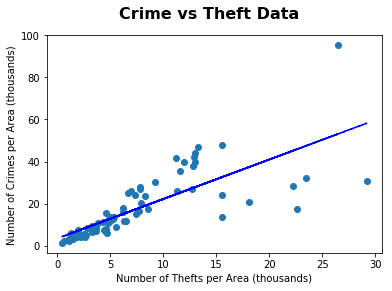

In [114]:
fig, ax = plt.subplots()

fig.suptitle("Crime vs Theft Data", fontsize=16, fontweight="bold")



ax.set_xlabel("Number of Thefts per Area (thousands)")
ax.set_ylabel("Number of Crimes per Area (thousands)")

ax.plot(x_axis, fake, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [117]:
#Exporting data to excel for more analysis
writer = ExcelWriter('Chicago Crime.xlsx')
no_theft_count.to_excel(writer,'Sheet1',index=True)
theft_count.to_excel(writer,'Sheet2',index=True)
writer.save()


In [126]:
#Finding 2014 data to test prediction
crime14=df.loc[df["Year"]==2014]
test_data=pd.merge(crime14,census,on="Community Area")
theft_test =test_data.loc[test_data["Primary Type"]=="THEFT"]
not_theft_test=test_data.loc[test_data["Primary Type"]!="THEFT"]
ttg=theft_test.groupby("Community Area")
nttg=not_theft_test.groupby("Community Area")
ttg_count=ttg.count()
nttg_count=nttg.count()
ttg_list=ttg_count["ID"]
nttg_list=nttg_count["ID"]
nttg_list

Community Area
1.0      2741
2.0      2355
3.0      2636
4.0      1289
5.0       907
6.0      3118
7.0      1872
8.0      4583
9.0       184
10.0      895
11.0      828
12.0      339
13.0      541
14.0     1687
15.0     2352
16.0     1862
17.0     1187
18.0      351
19.0     3655
20.0     1319
21.0     1530
22.0     3061
23.0     7477
24.0     4102
25.0    14884
26.0     5234
27.0     4728
28.0     4460
29.0     7021
30.0     3535
        ...  
48.0     1029
49.0     5619
50.0      850
51.0     1612
52.0     1098
53.0     3400
54.0     1151
55.0      453
56.0     1409
57.0      652
58.0     2256
59.0      702
60.0     1255
61.0     3811
62.0      691
63.0     1911
64.0      712
65.0     1211
66.0     4931
67.0     5991
68.0     5458
69.0     5140
70.0     1812
71.0     5970
72.0      601
73.0     2267
74.0      474
75.0     1488
76.0     1450
77.0     1477
Name: ID, Length: 77, dtype: int64

In [125]:
prediction = ttg_list*slope+intercept
prediction

Community Area
1.0     1993.287635
2.0     1985.793024
3.0     2212.505007
4.0     1144.522940
5.0     1191.364258
6.0     4837.492509
7.0     4161.103866
8.0     8262.529734
9.0      115.887580
10.0     674.236100
11.0     756.676821
12.0     232.054051
13.0     625.521128
14.0    1345.003784
15.0    1948.319969
16.0    1860.258290
17.0     719.203766
18.0     329.483994
19.0    2472.942739
20.0     889.706166
21.0    1577.336725
22.0    3825.720024
23.0    3282.360727
24.0    6077.850629
25.0    7323.829707
26.0    1849.016373
27.0    2036.381648
28.0    6450.707526
29.0    3173.688867
30.0    2319.303213
           ...     
48.0    1054.587608
49.0    3312.339171
50.0     702.340891
51.0    1208.227133
52.0     548.701365
53.0    1826.532540
54.0     441.903159
55.0     327.610341
56.0     983.388803
57.0     762.297779
58.0    1232.584619
59.0     670.488794
60.0    1028.356469
61.0    2725.885860
62.0     612.405559
63.0    1341.256478
64.0     543.080407
65.0    1680.387626
66.0 

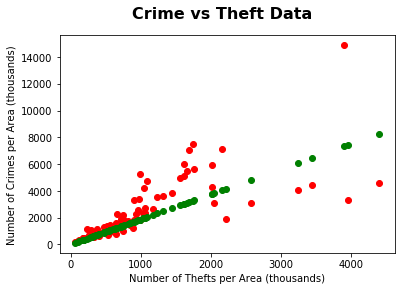

In [127]:
#Just Predicting 2014 Crime levels based on 2014 theft levels
fig, ax = plt.subplots()

fig.suptitle("Crime vs Theft Data", fontsize=16, fontweight="bold")



ax.set_xlabel("Number of Thefts per Area (thousands)")
ax.set_ylabel("Number of Crimes per Area (thousands)")

ax.plot(ttg_list, nttg_list, linewidth=0, marker='o',color="red")
ax.plot(ttg_list, prediction, linewidth=0, marker='o',color="green")


plt.show()